# Load Data

In [1]:
import pandas as pd

In [2]:
def convert_to_datetime(df, columns=[]):
  for col in columns:
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True)

In [3]:
category_lookups = pd.read_csv('https://raw.githubusercontent.com/KyleTy1er/dsaverlife_restricted/master/Category%20Lookups.csv?token=AM3U74VVG6EPHFXCKR4XEKS7HMJPM')

HTTPError: HTTP Error 404: Not Found

In [ ]:
dfPFA = pd.read_csv('https://raw.githubusercontent.com/KyleTy1er/dsaverlife_restricted/master/PFA_BA_PMT_Table_examples1.csv?token=AM3U74TIWUFMHLGT5PUOX427HVQOO')
dfPFA['created_at'] = pd.to_datetime(dfPFA['created_at'], infer_datetime_format=True)
dfPFA['updated_at'] = pd.to_datetime(dfPFA['created_at'], infer_datetime_format=True)
dfPFA['last_status_update_at'] = pd.to_datetime(dfPFA['created_at'], infer_datetime_format=True)

dfPFA = dfPFA.dropna(thresh=600 , axis=1)

In [ ]:
# load data 
dfBA = pd.read_csv('https://raw.githubusercontent.com/KyleTy1er/dsaverlife_restricted/master/PFA_BA_PMT_Table_examples2.csv?token=AM3U74RJKDWGSDIVHOXZDQ27HVQ72')

# change date columns to datetime
dfBA['created_at'] = pd.to_datetime(dfBA['created_at'], infer_datetime_format=True)
dfBA['updated_at'] = pd.to_datetime(dfBA['created_at'], infer_datetime_format=True)
dfBA['last_balance_update_at'] = pd.to_datetime(dfBA['created_at'], infer_datetime_format=True)

# drop na columns
dfBA_delete = ['official_name', 'last_balance_update_at', 'atlas_id', 'atlas_parent_id', 'rewards_basis']
dfBA = dfBA.drop(columns=dfBA_delete)

In [ ]:
dfPMT = pd.read_csv('https://raw.githubusercontent.com/KyleTy1er/dsaverlife_restricted/master/PFA_BA_PMT_Table_examples3.csv?token=AM3U74R4QWFKNPAWDQFJMWS7HVRGM')
dfPMT['date'] = pd.to_datetime(dfPMT['created_at'], infer_datetime_format=True)
dfPMT['updated_at'] = pd.to_datetime(dfPMT['created_at'], infer_datetime_format=True)
dfPMT['created_at'] = pd.to_datetime(dfPMT['created_at'], infer_datetime_format=True)

dfPMT = dfPMT.dropna(thresh=600 , axis=1)

# Explore Data

In [ ]:
#Install Pandas Profiling
%%capture
import sys
if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install pandas-profiling==2.*

In [ ]:

# get profile of our data set
df = dfBA
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()
profile

In [ ]:
# dfPMT
'''
plaid_account_id = 22
bank_account_id = 22
'''
#dfBA
'''
id = 22
plaid_account_id = 22
'''
#dfPFA
'''
item_id = 22
user_id = 22
'''

'\nitem_id = 22\nuser_id = 22\n'

In [ ]:
dfPFA.head(3)


,id,item_id,institution_name,state,user_id,created_at,updated_at,institution_id,subscribed_to_webhook,is_current,legacy_has_registered_webhook,tenant_id,last_status_update_at
0,56537,aYD6RAqyBdFMZMOv4gDRcRg7kLy1Z6UZVJKBR,Chime,connected,240359,2020-03-09 19:30:00,2020-03-09 19:30:00,ins_35,False,True,False,1,2020-03-09 19:30:00
1,56537,aYD6RAqyBdFMZMOv4gDRcRg7kLy1Z6UZVJKBR,Chime,connected,240359,2020-03-09 19:30:00,2020-03-09 19:30:00,ins_35,False,True,False,1,2020-03-09 19:30:00
2,56537,aYD6RAqyBdFMZMOv4gDRcRg7kLy1Z6UZVJKBR,Chime,connected,240359,2020-03-09 19:30:00,2020-03-09 19:30:00,ins_35,False,True,False,1,2020-03-09 19:30:00


In [ ]:
dfBA.head(3)

,id,current_balance_cents,created_at,updated_at,name,account_type,account_subtype,plaid_account_id,type,plaid_financial_authentication_id,available_balance_cents,mask,initial_balance_cents,main_saving,tenant_id,plaid_state
0,132151,60136,2020-03-09 19:30:00,2020-03-09 19:30:00,Chime Savings,depository,savings,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,PlaidBankAccount,56537,0,9673.0,0,True,1,connected
1,132151,60136,2020-03-09 19:30:00,2020-03-09 19:30:00,Chime Savings,depository,savings,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,PlaidBankAccount,56537,0,9673.0,0,True,1,connected
2,132151,60136,2020-03-09 19:30:00,2020-03-09 19:30:00,Chime Savings,depository,savings,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,PlaidBankAccount,56537,0,9673.0,0,True,1,connected


In [ ]:
dfPMT.head(3)

,id,date,amount_cents,plaid_transaction_id,purpose,pending,category_id,bank_account_id,created_at,updated_at,plaid_account_id,tenant_id,iso_currency_code
0,38192796,2020-08-06 02:36:00,38743,167rJg598nCa5aQyzwK7sy3g0OrKzyFmeq7bJ,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD
1,38192795,2020-08-06 02:36:00,8000,q6o4pqyZ5rC1Q1vRwyd8U0NnXdJErxfJymx3y,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD
2,38192794,2020-08-06 02:36:00,2500,L9bMRxkLeqhKLKongkEMcLE3yevdZLI0nPOoX,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD


In [ ]:
category_lookups[category_lookups['category_name'] == 'Financial']

,id,plaid_category_id,group,parent_id,category_name,parent_category_name,grandparent_category_name
320,338,18020000.0,place,280.0,Financial,Service,Utilities
696,339,NaN,NaN,280.0,Financial,Service,Utilities
711,998,NaN,NaN,939.0,Financial,Service,Utilities


In [ ]:
   """
   if any value in the column dfPMT['category_id'] exists in category_lookups['plaid_category_id'] 
   then for that value ... return these row values: category_lookups['category_name'] and category_lookups['parent_category_name']
   and category_lookups['grandparent_category_name'] as new columns in dfPMT
   """

"\nif any value in the column dfPMT['category_id'] exists in category_lookups['plaid_category_id'] \nthen for that value ... return these row values: category_lookups['category_name'] and category_lookups['parent_category_name']\nand category_lookups['grandparent_category_name'] as new columns in dfPMT\n"

# Merging tables and subsetting

In [ ]:
dfPMT_categorized = pd.merge(dfPMT, category_lookups,  how='left', left_on=['category_id'], right_on = ['plaid_category_id'])

In [ ]:
dfPMT_categorized.head(3)

,id_x,date,amount_cents,plaid_transaction_id,purpose,pending,category_id,bank_account_id,created_at,updated_at,plaid_account_id,tenant_id,iso_currency_code,id_y,plaid_category_id,group,parent_id,category_name,parent_category_name,grandparent_category_name
0,38192796,2020-08-06 02:36:00,38743,167rJg598nCa5aQyzwK7sy3g0OrKzyFmeq7bJ,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD,599,21006000.0,special,593.0,Debit,Transfer,Transfers
1,38192795,2020-08-06 02:36:00,8000,q6o4pqyZ5rC1Q1vRwyd8U0NnXdJErxfJymx3y,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD,599,21006000.0,special,593.0,Debit,Transfer,Transfers
2,38192794,2020-08-06 02:36:00,2500,L9bMRxkLeqhKLKongkEMcLE3yevdZLI0nPOoX,withdrawal,False,21006000,132151,2020-08-06 02:36:00,2020-08-06 02:36:00,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,1,USD,599,21006000.0,special,593.0,Debit,Transfer,Transfers


In [ ]:
# Filter dataframe to show only the user ID and the transaction type for each transaction

dfPMT_categorized_subset = dfPMT_categorized[['plaid_account_id','category_name','parent_category_name','grandparent_category_name', 'amount_cents', 'date']]

In [ ]:
dfPMT_categorized_subset.head(3)

,plaid_account_id,category_name,parent_category_name,grandparent_category_name,amount_cents,date
0,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,Debit,Transfer,Transfers,38743,2020-08-06 02:36:00
1,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,Debit,Transfer,Transfers,8000,2020-08-06 02:36:00
2,kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b,Debit,Transfer,Transfers,2500,2020-08-06 02:36:00


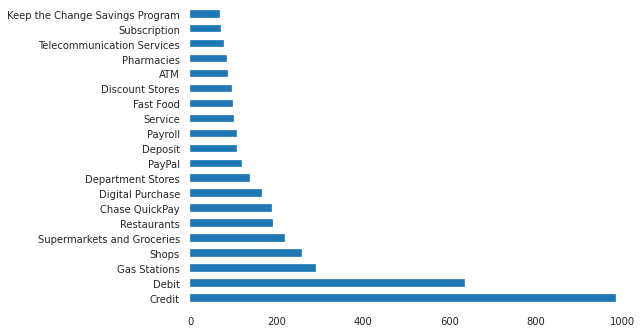

In [ ]:
dfPMT_categorized_subset['category_name'].value_counts().loc[lambda x : x>65].plot(kind='barh')

In [ ]:
category_lookups['plaid_category_id'].nunique()

614

In [ ]:
category_lookups

,id,plaid_category_id,group,parent_id,category_name,parent_category_name,grandparent_category_name
0,656,0.0,NaN,NaN,NaN,0,Other
1,665,786.0,NaN,NaN,NaN,0,Other
2,658,5645.0,NaN,NaN,NaN,0,Other
3,667,6787.0,NaN,NaN,NaN,0,Other
4,661,7687.0,NaN,NaN,NaN,0,Other
...,...,...,...,...,...,...,...
715,1085,NaN,NaN,939.0,Mining,Service,Utilities
716,1094,NaN,NaN,939.0,Personal Care,Service,Utilities
717,1110,NaN,NaN,939.0,Real Estate,Service,Utilities
718,1139,NaN,NaN,939.0,Utilities,Service,Utilities


# Visualize spending for a given user

### Subset data down to a specific user

In [ ]:
# Get list of all user ID's

users = transaction_type_user['plaid_account_id'].value_counts()
print(users)

1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ    1360
mEQmv8ybP1t3o3bYnKzwFqP5jad1KKUM8N06o    1280
vq4mMRdZLeFon7bK63jefLOomaRPYBCmAJP6g    1073
ojQ7ZARMD3HvOxe0AM7ZfgqByxymNgcBdErKK     351
rekPD6wxbPfEqbVbDpYZck38dan4K3sB8rx5n     168
1E1L81Ld3RfgPL7XdkAZtZd7V169xXHmQROrv     136
X1VPwkEJAzHBEaByOrmDHMoDQEJO5ws4OnkXy     135
kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b     124
v37a5rODaRHkkBgZje0LFjLLVPYmr9fmzjr9D     119
vMr0dbz7qMFmmVkDbXEXTJkRz8P4netmY9jjj      97
prowokzo5PT6mzBPX3gRuDN6k1dr0aFJD14v6      92
5AErXqkmRPiPy3xda15LIA1MYQwkx7f1wx65v      62
jZrge9o4XVcbdaxM78R5C7K6BrqD1MhRMdoym      55
DgJqoXeN79hMVXB53XYBH4wJzPk0evUZEKpbE      34
KnrQ0oNwd1C3RNPaEBbaIqNxge7gBXTQvyjvA      28
XgAqyyoExpUvy0yX8Z3YH5ALX4x0aEf4kqq0q      20
a58a97rVLZs6LZdYRn94sLvNR0jRq1IZL0pnq      16
Oj09YgyXX9h308gOwLjxiOXYZn8AmjC8ejqVj      16
PrO6nDOgqru8qg6dQ5wOHjP3AzBJ9xtmrnYVM      14
ALZLMwDdjmH3zXakq4BDFJ3zgX0roNU6bMEE6      12
pRkakg38abt86wxvD380UAVNDE9XNAuJJ3Aor      11
V34Dr53jNYCw3KgBE7L6uvBoaLKPk8traR

In [ ]:
# Get data for a specific user

kevin = dfPMT_categorized_subset[ dfPMT_categorized_subset['plaid_account_id']=='1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ']
kevin.head()

,plaid_account_id,category_name,parent_category_name,grandparent_category_name,amount_cents,date
3694,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,1039,2020-08-06 05:58:00
3695,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Gas Stations,Travel,Transportation,400,2020-08-06 05:58:00
3696,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,2624,2020-08-06 05:58:00
3697,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,PayPal,Third Party,Financial,-30105,2020-08-06 05:58:00
3698,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Loans and Mortgages,Financial,Financial,14300,2020-08-05 05:41:00


### Explore data for our chosen user

In [ ]:
kevin.shape

(1360, 6)

In [ ]:
kevin['grandparent_category_name'].value_counts()

Shopping          477
Transfers         242
Food              225
Transportation    146
Utilities         123
Financial         112
Auto               19
Govt Agencies      11
Payments            2
Recreation          2
Other               1
Name: grandparent_category_name, dtype: int64

In [ ]:
kevin['parent_category_name'].value_counts()

Shops                             458
Transfer                          242
Travel                            146
Service                           118
Food and Beverage Store           113
Third Party                        88
Restaurants                        55
Food and Drink                     54
Financial                          18
Computers and Electronics          18
Community                          11
Car Service                        10
Automotive                          9
Bank Fees                           6
Utilities                           5
Food and Beverage                   3
Recreation                          2
Payment                             2
Clothing and Accessories            1
Organizations and Associations      1
Name: parent_category_name, dtype: int64

### Clean the user's data 

In [ ]:
# Remove transfers and income (i.e. non-spending transactions)

kevin_expenses = kevin[ (kevin['grandparent_category_name'] != 'Transfers') & (kevin['amount_cents'] > 0)]
kevin_expenses

,plaid_account_id,category_name,parent_category_name,grandparent_category_name,amount_cents,date
3694,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,1039,2020-08-06 05:58:00
3695,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Gas Stations,Travel,Transportation,400,2020-08-06 05:58:00
3696,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,2624,2020-08-06 05:58:00
3698,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Loans and Mortgages,Financial,Financial,14300,2020-08-05 05:41:00
3700,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Fast Food,Restaurants,Food,1589,2020-08-05 05:41:00
...,...,...,...,...,...,...
5048,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Shops,Shops,Shopping,1089,2020-03-08 01:47:00
5049,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Shops,Shops,Shopping,777,2020-03-08 01:47:00
5050,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Pets,Shops,Shopping,5000,2020-03-08 01:47:00
5051,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Restaurants,Food and Drink,Food,100,2020-03-08 01:47:00


In [ ]:
# Add a dollar spent column
kevin_expenses['amount_dollars'] = kevin_expenses['amount_cents'] / 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kevin_expenses.head()

,plaid_account_id,category_name,parent_category_name,grandparent_category_name,amount_cents,date,amount_dollars
3694,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,1039,2020-08-06 05:58:00,10.39
3695,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Gas Stations,Travel,Transportation,400,2020-08-06 05:58:00,4.00
3696,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Supermarkets and Groceries,Food and Beverage Store,Food,2624,2020-08-06 05:58:00,26.24
3698,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Loans and Mortgages,Financial,Financial,14300,2020-08-05 05:41:00,143.00
3700,1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ,Fast Food,Restaurants,Food,1589,2020-08-05 05:41:00,15.89


### Visualize

In [ ]:
import plotly.express as px

df = kevin_expenses

fig = px.pie(df, values='amount_dollars', names='grandparent_category_name', title="Kevin's Spending Habits")
fig.show()

In [ ]:
fig = px.bar(df, x = 'grandparent_category_name', y = 'amount_dollars', title = "Kevin's Spending Habits", width=1000)
fig.show()

In [ ]:
category = 'grandparent_category_name'
cat_count = kevin_non_transfer[category].value_counts(normalize = True)
cat_count

Shopping          0.460348
Food              0.217602
Transportation    0.141199
Utilities         0.118956
Financial         0.046422
Auto              0.008704
Govt Agencies     0.001934
Payments          0.001934
Recreation        0.001934
Other             0.000967
Name: grandparent_category_name, dtype: float64

### Refactor the above visualization code into a function

In [ ]:
def grapher(user, df, category,  threshold = 0.05, user_name = 'Kevin', graph_type = 'pie', start_date=, end_date,):
    kevin = df[ df['plaid_account_id']==user ]

    kevin_non_transfer = kevin[ (kevin[category] != 'Transfers') & (kevin['amount_cents'] > 0)]

    kevin_non_transfer['amount_dollars'] = kevin_non_transfer['amount_cents'] / 100

    cat_count = kevin_non_transfer[category].value_counts(normalize = True)

    for i in range(len(cat_count.index)):
        if cat_count[i] <= threshold:
            bad_cat = cat_count.index[i]

            kevin_non_transfer = kevin_non_transfer.replace([bad_cat], ['Other'])

    df = kevin_non_transfer

    if graph_type == 'pie':
      fig = px.pie(df, values='amount_dollars', names=category, title=f"{user_name}'s Spending Habits")
      fig.show()
      return
    
    elif graph_type == 'bar':
      fig = px.bar(df, x = 'date', y = 'amount_dollars', color=category, title = "Kevin's Spending Habits", width=1000)
      fig.show()
      return

    else:
      raise TypeError("Invalid Chart Type")

  
grapher('1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ', dfPMT_categorized_subset, 'grandparent_category_name', graph_type='bar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
users

1635ob1dkQIz1QMjLmBpt0E36VyM96ImeyrgZ    1360
mEQmv8ybP1t3o3bYnKzwFqP5jad1KKUM8N06o    1280
vq4mMRdZLeFon7bK63jefLOomaRPYBCmAJP6g    1073
ojQ7ZARMD3HvOxe0AM7ZfgqByxymNgcBdErKK     351
rekPD6wxbPfEqbVbDpYZck38dan4K3sB8rx5n     168
1E1L81Ld3RfgPL7XdkAZtZd7V169xXHmQROrv     136
X1VPwkEJAzHBEaByOrmDHMoDQEJO5ws4OnkXy     135
kYgkpNBD4yF0q0db7vyeCeBR5VXVOgsRkAJ7b     124
v37a5rODaRHkkBgZje0LFjLLVPYmr9fmzjr9D     119
vMr0dbz7qMFmmVkDbXEXTJkRz8P4netmY9jjj      97
prowokzo5PT6mzBPX3gRuDN6k1dr0aFJD14v6      92
5AErXqkmRPiPy3xda15LIA1MYQwkx7f1wx65v      62
jZrge9o4XVcbdaxM78R5C7K6BrqD1MhRMdoym      55
DgJqoXeN79hMVXB53XYBH4wJzPk0evUZEKpbE      34
KnrQ0oNwd1C3RNPaEBbaIqNxge7gBXTQvyjvA      28
XgAqyyoExpUvy0yX8Z3YH5ALX4x0aEf4kqq0q      20
a58a97rVLZs6LZdYRn94sLvNR0jRq1IZL0pnq      16
Oj09YgyXX9h308gOwLjxiOXYZn8AmjC8ejqVj      16
PrO6nDOgqru8qg6dQ5wOHjP3AzBJ9xtmrnYVM      14
ALZLMwDdjmH3zXakq4BDFJ3zgX0roNU6bMEE6      12
pRkakg38abt86wxvD380UAVNDE9XNAuJJ3Aor      11
V34Dr53jNYCw3KgBE7L6uvBoaLKPk8traR

In [ ]:
input_user = 'mEQmv8ybP1t3o3bYnKzwFqP5jad1KKUM8N06o'
grapher(input_user, transaction_type_user, 'category_name')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
input_user = 'mEQmv8ybP1t3o3bYnKzwFqP5jad1KKUM8N06o'
grapher(input_user, transaction_type_user, 'grandparent_category_name', graph_type='bar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: ignored